In [1]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

import sys
sys.path.append("../")

from utils.dataset import FreiHAND
from utils.model import ShallowUNet
from utils.trainer import Trainer
from utils.prep_utils import (
    blur_heatmaps,
    IoULoss,
    COLORMAP,
    N_KEYPOINTS,
    N_IMG_CHANNELS,
    get_norm_params,
    show_data,
)

C:\Users\user2\.conda\envs\torch1101py37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Train Parameters

In [2]:
config = {
    "data_dir": "D:/Users/user2/Desktop/hand_landmark/Dataset/FreiHAND_pub_v2",
    "epochs": 1000,
    "batch_size": 48,
    "batches_per_epoch": 50,
    "batches_per_epoch_val": 20,
    "learning_rate": 0.1,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

## Data

In [3]:
train_dataset = FreiHAND(config=config, set_type="train")
train_dataloader = DataLoader(
    train_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

val_dataset = FreiHAND(config=config, set_type="val")
val_dataloader = DataLoader(
    val_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

image_names: 130240
K_matrix: 130240
anno: 130240
image_names: 130240
K_matrix: 130240
anno: 130240


In [4]:
#get_norm_params(train_dataloader)
#print(get_norm_params(train_dataloader))

2170it [29:34,  1.22it/s]
2170it [21:21,  1.69it/s]

{'mean': tensor([0.4504, 0.4508, 0.3950]), 'std': tensor([0.2210, 0.2149, 0.2380])}


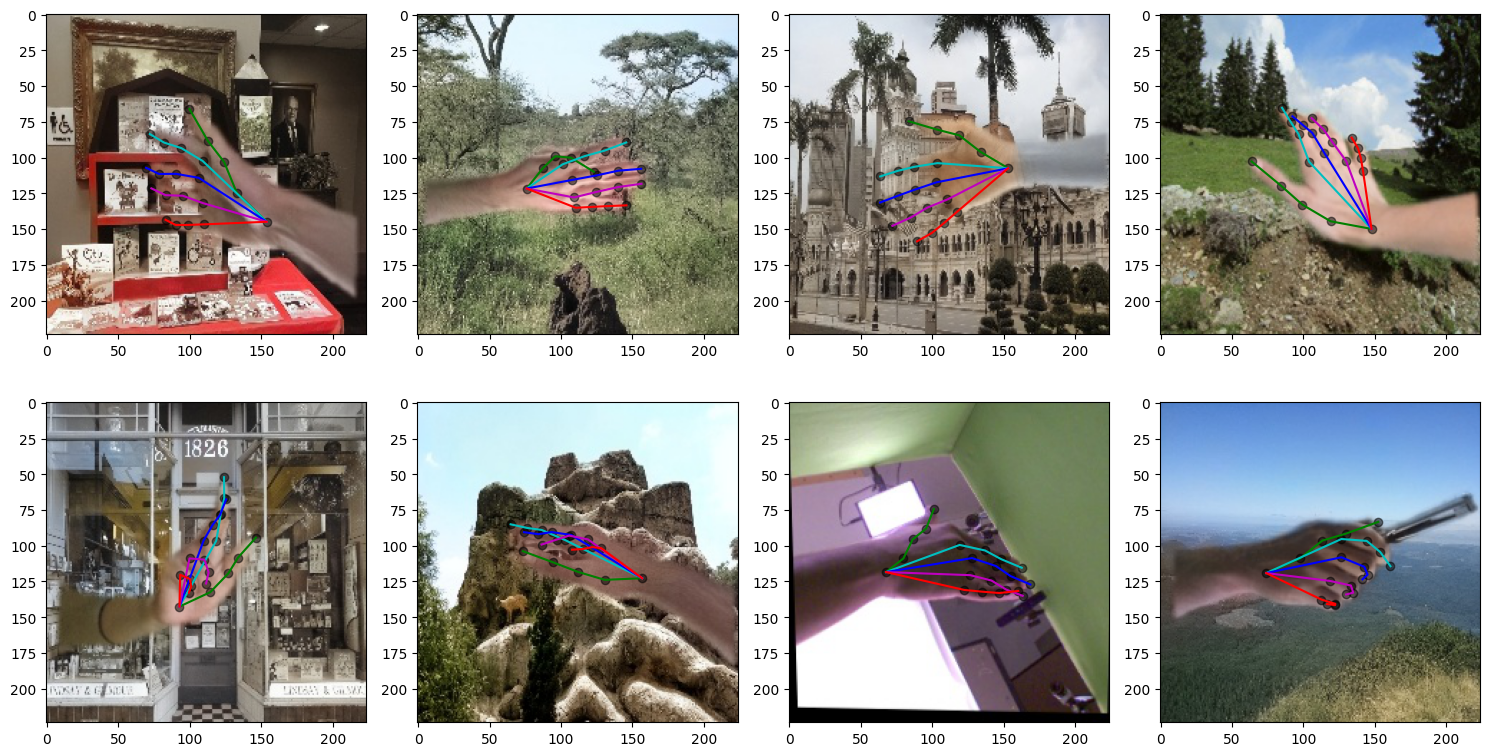

In [4]:
# visualize random batch of data train samples + labels
show_data(train_dataset, n_samples=8)

## Model

In [4]:
model = ShallowUNet(N_IMG_CHANNELS, N_KEYPOINTS)
model = model.to(config["device"])

criterion = IoULoss()
optimizer = optim.SGD(model.parameters(), lr=config["learning_rate"])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=20, verbose=True, threshold=0.00001
)
print(model)

ShallowUNet(
  (conv_down1): ConvBlock(
    (double_conv): Sequential(
      (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): ReLU(inplace=True)
      (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): ReLU(inplace=True)
    )
  )
  (conv_down2): ConvBlock(
    (double_conv): Sequential(
      (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): ReLU(inplace=True)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): ReLU(inplace=True)
    )
  )
  (conv_down3

## Training

In [6]:
trainer = Trainer(model, criterion, optimizer, config, scheduler)
model = trainer.train(train_dataloader, val_dataloader)

Epoch: 1/1000, Train Loss=0.9930644035, Val Loss=0.9931082726
Epoch: 2/1000, Train Loss=0.9929977655, Val Loss=0.9930699893
Epoch: 3/1000, Train Loss=0.9929236174, Val Loss=0.9930280362
Epoch: 4/1000, Train Loss=0.9928190112, Val Loss=0.9929888788
Epoch: 5/1000, Train Loss=0.9926741719, Val Loss=0.9929552277
Epoch: 6/1000, Train Loss=0.9925474524, Val Loss=0.992915602
Epoch: 7/1000, Train Loss=0.992335856, Val Loss=0.9928958813
Epoch: 8/1000, Train Loss=0.9921456575, Val Loss=0.9928433895
Epoch: 9/1000, Train Loss=0.9918125272, Val Loss=0.992791349
Epoch: 10/1000, Train Loss=0.9914939404, Val Loss=0.992738701
Epoch: 11/1000, Train Loss=0.9907700419, Val Loss=0.9926949342
Epoch: 12/1000, Train Loss=0.9902807474, Val Loss=0.9925930557
Epoch: 13/1000, Train Loss=0.9890384078, Val Loss=0.9925462064
Epoch: 14/1000, Train Loss=0.9861299396, Val Loss=0.9925944692
Epoch: 15/1000, Train Loss=0.9838016629, Val Loss=0.9924464197
Epoch: 16/1000, Train Loss=0.9758413434, Val Loss=0.9923976319
Epoch

Epoch: 130/1000, Train Loss=0.6292947531, Val Loss=0.5972703156
Epoch: 131/1000, Train Loss=0.5040895939, Val Loss=0.5905212902
Epoch: 132/1000, Train Loss=0.5738254786, Val Loss=0.5898369863
Epoch: 133/1000, Train Loss=0.5169186592, Val Loss=0.5882407285
Epoch: 134/1000, Train Loss=0.5186565518, Val Loss=0.583143677
Epoch: 135/1000, Train Loss=0.5543620586, Val Loss=0.5909821192
Epoch: 136/1000, Train Loss=0.5319703817, Val Loss=0.5916979199
Epoch: 137/1000, Train Loss=0.5526020527, Val Loss=0.5900076826
Epoch: 138/1000, Train Loss=0.5163987875, Val Loss=0.5954165061
Epoch: 139/1000, Train Loss=0.5413445234, Val Loss=0.5864374382
Epoch: 140/1000, Train Loss=0.5290151834, Val Loss=0.5829332414
Epoch: 141/1000, Train Loss=0.5172060728, Val Loss=0.5801617248
Epoch: 142/1000, Train Loss=0.5308974981, Val Loss=0.5832062931
Epoch: 143/1000, Train Loss=0.5358122587, Val Loss=0.5816305904
Epoch: 144/1000, Train Loss=0.5130255222, Val Loss=0.5818226394
Epoch: 145/1000, Train Loss=0.5097203255,

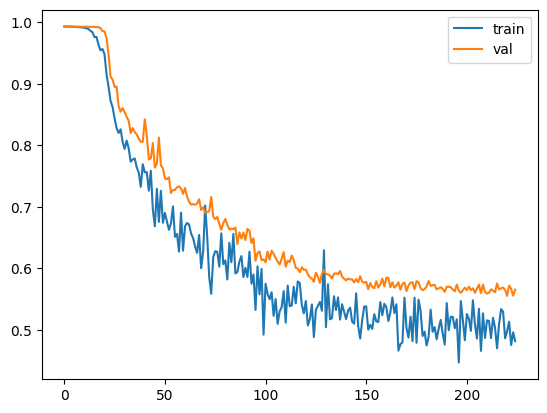

In [7]:
plt.plot(trainer.loss["train"], label="train")
plt.plot(trainer.loss["val"], label="val")
plt.legend()
plt.show()

In [8]:
torch.save(model, 'D:/Users/user2/Desktop/2D-Hand-Pose-Estimation-RGB/weights/hand_keypoint.pt')